# EdgeDetection And HoleFilling
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def BoundryExtraction(path):
    img = cv2.imread(path, 0)

    se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, se)
    beta = img - erosion

    plt.figure(figsize=(10, 7))
    plt.subplot(131), plt.imshow(img, cmap='gray')
    plt.subplot(132), plt.imshow(erosion, cmap='gray')
    plt.subplot(133), plt.imshow(beta, cmap='gray')
    plt.show()

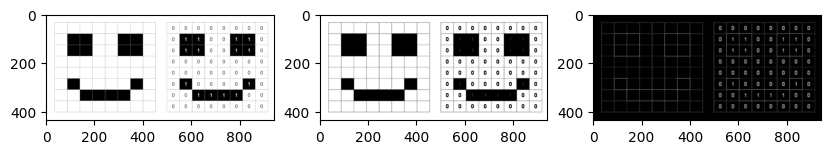

In [3]:
BoundryExtraction('Images/img1bin.png')

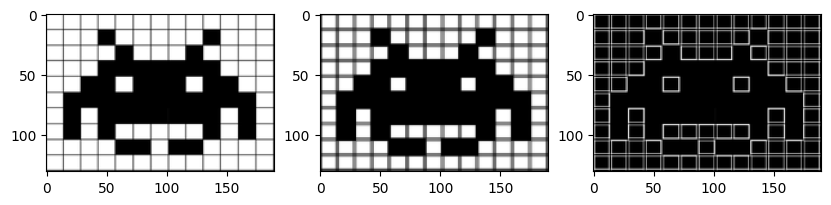

In [4]:
BoundryExtraction('Images/img2bin.png')

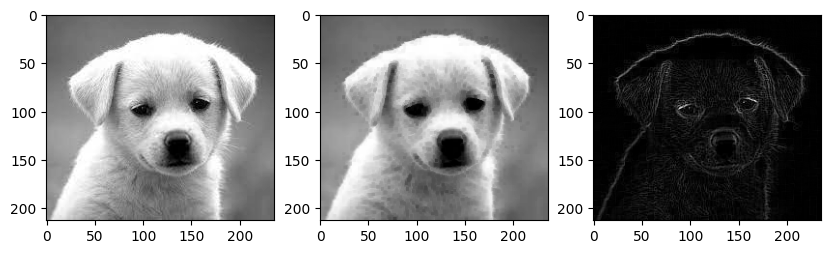

In [5]:
BoundryExtraction('Images/img1gray.jpeg')

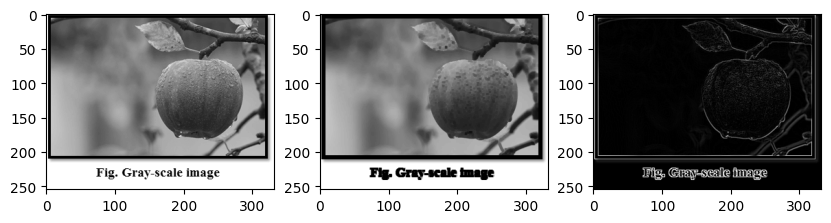

In [6]:
BoundryExtraction('Images/img2gray.png')

In [18]:
# Read image
im_in = cv2.imread('Images/img1gray.png', cv2.IMREAD_GRAYSCALE)

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV)

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

# Display images.
plt.imshow(im_in, cmap='gray')
plt.show()
plt.imshow(im_th, cmap='gray')
plt.show()
plt.imshow(im_floodfill, cmap='gray')
plt.show()
plt.imshow(im_floodfill_inv, cmap='gray')
plt.show()
plt.imshow(im_out, cmap='gray')
plt.show()

[ WARN:0@1537.098] global loadsave.cpp:244 findDecoder imread_('Images/img1gray.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'copy'

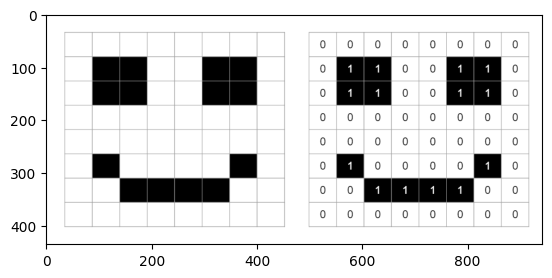

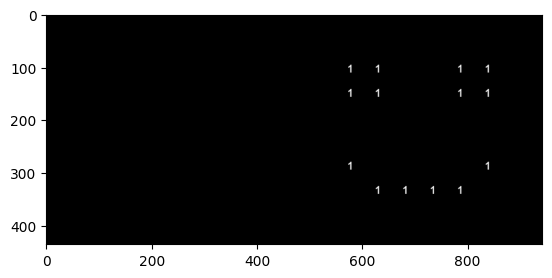

In [26]:
# Load the grayscale image
img = cv2.imread('Images/img1bin.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
ret, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)

# Copy the mask to create a floodfill mask
floodfill_mask = mask.copy()

# Specify the seed point for floodfilling
h, w = img.shape[:2]
seed_point = (w//2, h//2)

# Perform floodfilling on the mask
cv2.floodFill(floodfill_mask, None, seed_point, 255)

# Invert the floodfill mask
floodfill_mask_inv = cv2.bitwise_not(floodfill_mask)

# Combine the binary mask and the floodfill mask to get the final mask
filled_mask = mask | floodfill_mask_inv

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=filled_mask)

# Show the input and output images side by side
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(result, cmap='gray')
plt.show()